# Tutorial: plot tempo curves
This tutorial demonstrates the first steps to create tempo curves from Open Music Annotations

## Loading Data

In [5]:
# Loading Beat Annotation Data from oma.digital
# import omapy library
from omapy import oma

oma_credentials = {
    "url": "https://oma.digital/",
    "token": "enter-your-token-here"
}

# oma provides a handle to omapy API features via Login()
oma = oma.Login(oma_credentials["url"], oma_credentials["token"])

# place your recording IDs here
recording_ids = []

# data structure to keep local data
sessions = []
for recording_id in recording_ids:
    # fetch recording object with given id
    recording = oma.recording(recording_id)
    # fetch annotation sessions from that object
    recording_sessions = recording.get_annotation_sessions()
    for session in recording_sessions:
        sessions.append({
            'recording': recording.dictionary(),
            # load session object containing actual annotations
            'session': oma.annotation_session(session["id"])
        })

# see what we've got
print(sessions)

[{'recording': {'digital_audio': {'id': 189082}, 'id': 189081, 'interpretation': {'id': 189490, 'title': 'Davis Concertgebouw 1983'}, 'abstract_music_part': {'id': 189491}, 'title': 'Sibelius_Sym6_Davis_Concertgebouw_1983live_youtube'}, 'session': <omapy.oma.AnnotationSession object at 0x7f8971bac4e0>}, {'recording': {'digital_audio': {'id': 189086}, 'id': 189085, 'interpretation': {'id': 189456, 'title': 'Gibson SNO 1983'}, 'abstract_music_part': {'id': 189457}, 'title': 'Sibelius_Sym6_Gibson_SNO_1983_youtube_I.wav-converted.wav'}, 'session': <omapy.oma.AnnotationSession object at 0x7f8970ffba90>}, {'recording': {'digital_audio': {'id': 189097}, 'id': 189096, 'interpretation': {'id': 189464, 'title': 'Ashkenazy Philharmonia O 1984'}, 'abstract_music_part': {'id': 189465}, 'title': 'Sibelius_Sym6_I_Ashkenazy_PhilharmoniaO_1984.wav-converted.wav'}, 'session': <omapy.oma.AnnotationSession object at 0x7f8970fe7198>}, {'recording': {'digital_audio': {'id': 189103}, 'id': 189102, 'interpret

## Processing data

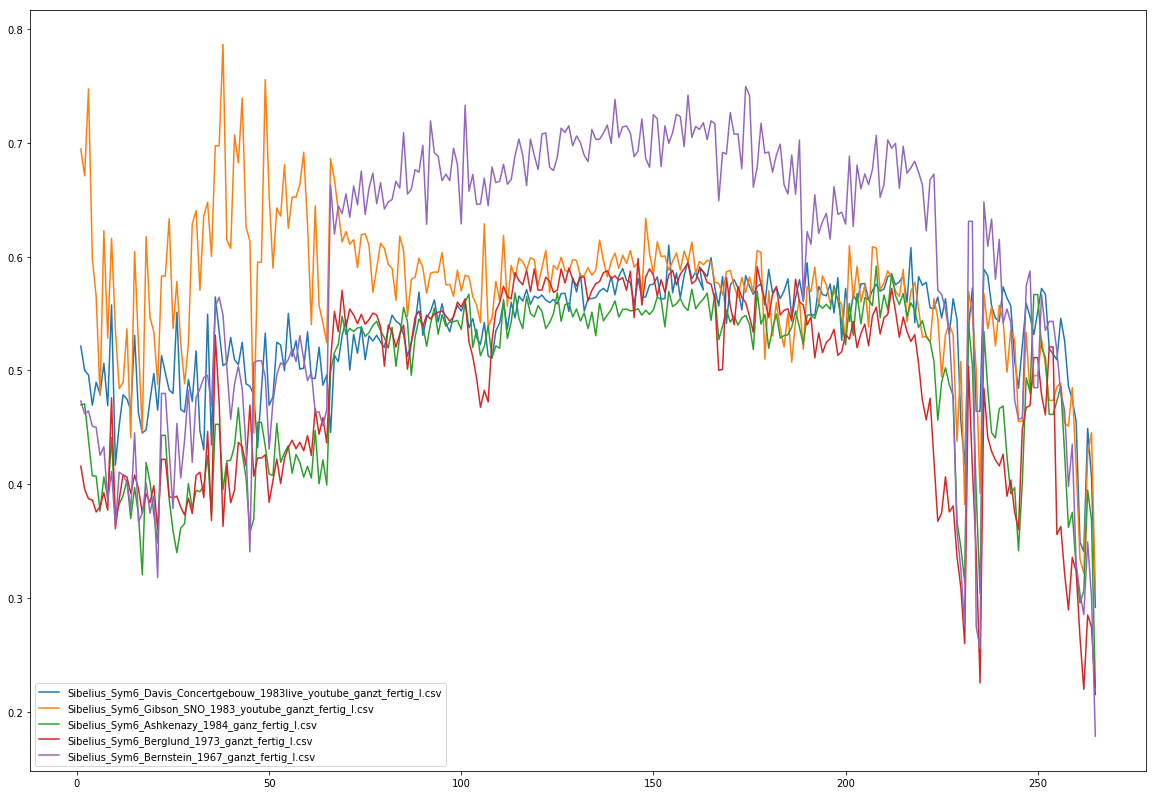

In [9]:
# prepare a data structure to hold the data for plotting
plots = []
for session in sessions:
    # use library function to calculate tempo from beats
    x, y = session["session"].get_tempo_chart()
    plots.append({
        "session": session["session"],
        "x": x,
        "y": y
    })

# use plotting library
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.clear()
fig.set_figheight(14)
fig.set_figwidth(20)

# draw individual lines
for plot in plots:
    # dictionary() provides python dict form omapy API objects
    session_data = plot["session"].dictionary()
    ax.plot(plot["x"], plot["y"], label=session_data["title"])

#ax.set_ylim([0,3])
ax.legend()